## ARBOLES DE DECISIÓN

## María Fernanda Ruiz González

## Análisis de Datos - Grupo 202016908_71

In [209]:
#Importamos las librerías
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [211]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [213]:
#Miramos la cantidad de filas y columnas que tiene nuestra data
data.shape

(891, 12)

In [215]:
#Miramos la descripción de nuestra tabla
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [217]:
#Miramos si existen valores nulos:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [219]:
#Verificamos las columnas:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

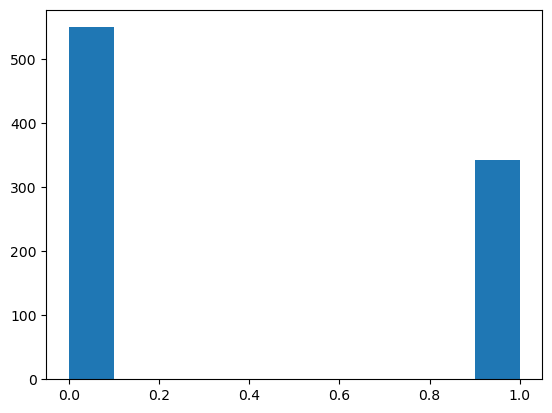

In [221]:
#Miramos estadísticamente (en grafica) el valor a identificar
plt.hist(data.Survived)

(array([89., 89., 89., 89., 89., 89., 89., 89., 89., 90.]),
 array([  1.,  90., 179., 268., 357., 446., 535., 624., 713., 802., 891.]),
 <BarContainer object of 10 artists>)

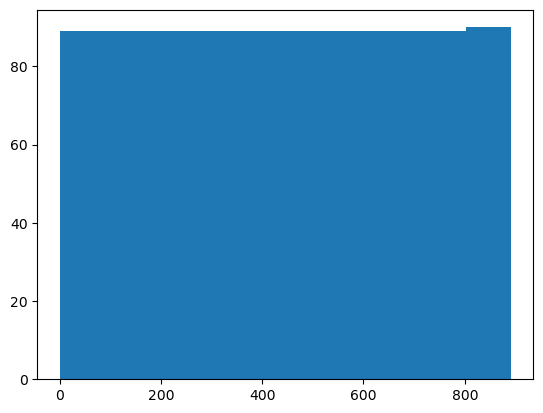

In [223]:
#Miramos estadísticamente (en grafica) el valor a identificar
plt.hist(data.PassengerId)

(array([577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

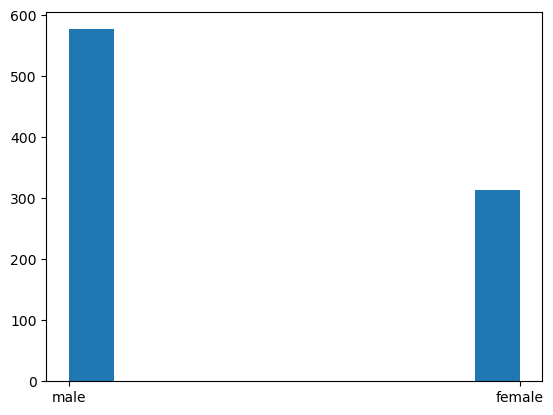

In [225]:
#Miramos estadísticamente (en grafica) el valor a identificar
plt.hist(data.Sex)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

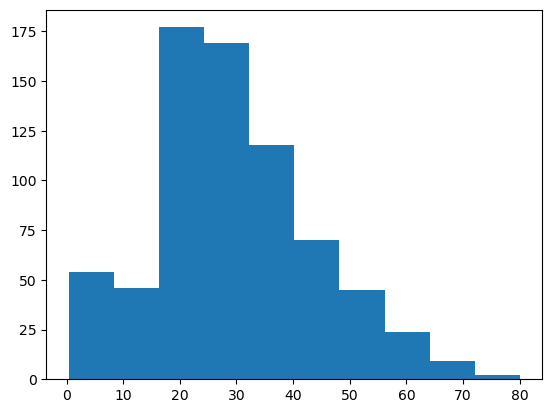

In [227]:
#Miramos estadísticamente (en grafica) el valor a identificar
plt.hist(data.Age)

<Axes: xlabel='PassengerId', ylabel='Survived'>

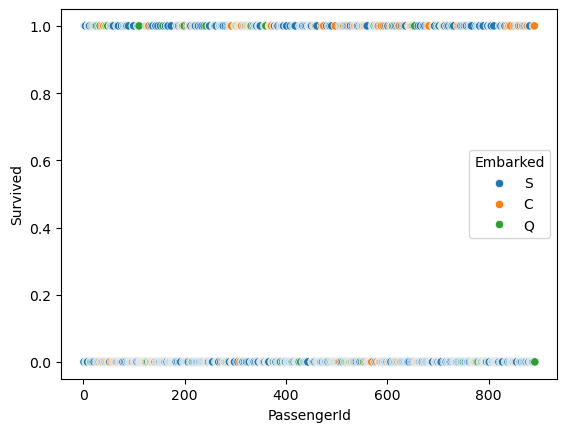

In [229]:
#Podemos ver un diagrama de dispersión
sns.scatterplot(x="PassengerId", y="Survived", hue="Embarked", data=data)

<Axes: xlabel='PassengerId', ylabel='Sex'>

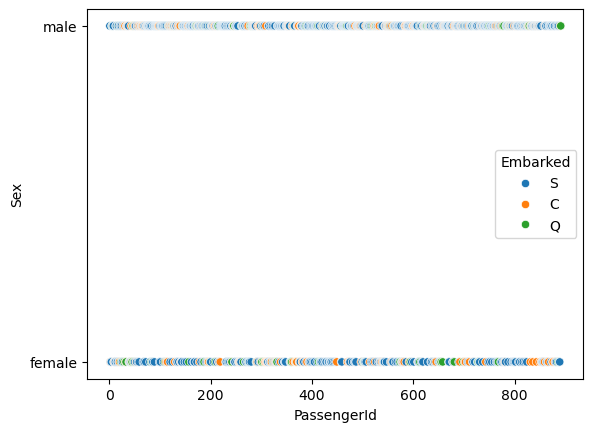

In [231]:
#Podemos ver un diagrama de dispersión
sns.scatterplot(x="PassengerId", y="Sex", hue="Embarked", data=data)

<Axes: xlabel='PassengerId', ylabel='Age'>

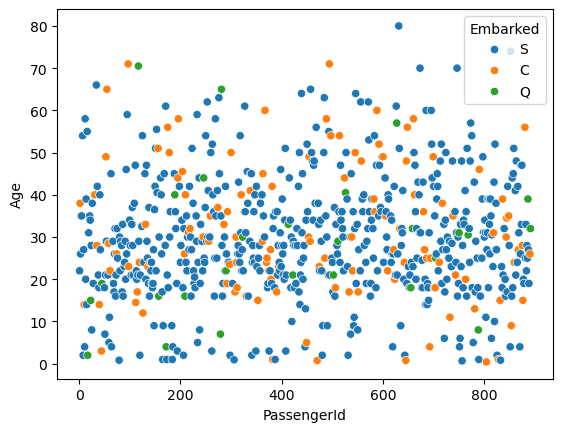

In [233]:
#Podemos ver un diagrama de dispersión
sns.scatterplot(x="PassengerId", y="Age", hue="Embarked", data=data)

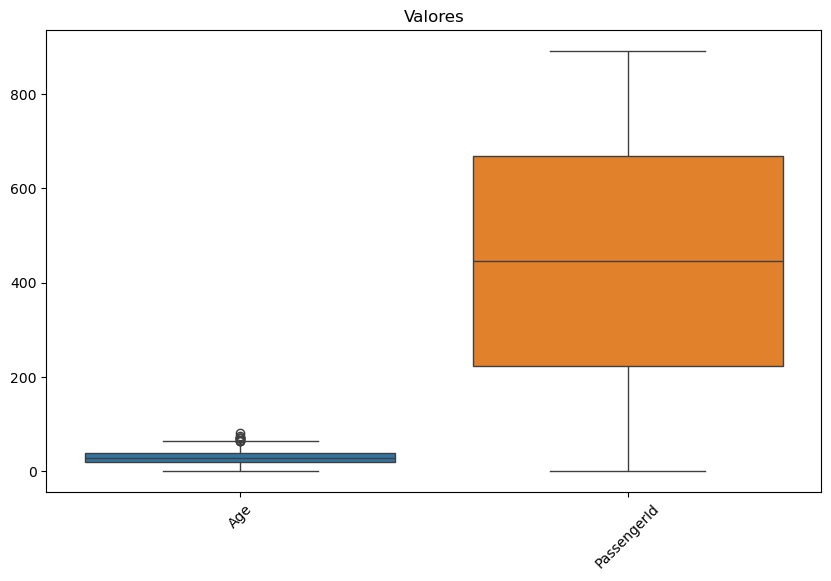

In [235]:
#Valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[["Sex", "Age", "PassengerId"]])
plt.xticks(rotation=45)
plt.title("Valores")
plt.show()

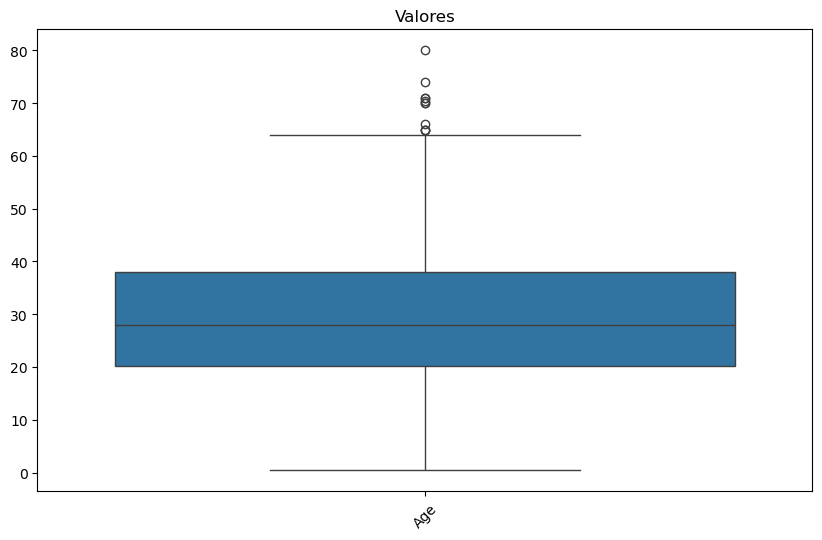

In [237]:
#Valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[["Age", "Sex", "Embarked"]])
plt.xticks(rotation=45)
plt.title("Valores")
plt.show()

In [239]:
#Imprimir valores
predictors_col = ["Survived", "Fare", "Age"]
target_col = ["PassengerId"]

In [241]:
predictors = data[predictors_col]
target = data[target_col]

In [243]:
predictors

,Survived,Fare,Age
0,0,7.2500,22.0
1,1,71.2833,38.0
2,1,7.9250,26.0
3,1,53.1000,35.0
4,0,8.0500,35.0
...,...,...,...
886,0,13.0000,27.0
887,1,30.0000,19.0
888,0,23.4500,NaN
889,1,30.0000,26.0


In [245]:
target

,PassengerId
0,1
1,2
2,3
3,4
4,5
...,...
886,887
887,888
888,889
889,890


In [247]:
corr = predictors_numeric.corr()
print(corr)

          Survived      Fare       Age
Survived  1.000000  0.257307 -0.077221
Fare      0.257307  1.000000  0.096067
Age      -0.077221  0.096067  1.000000


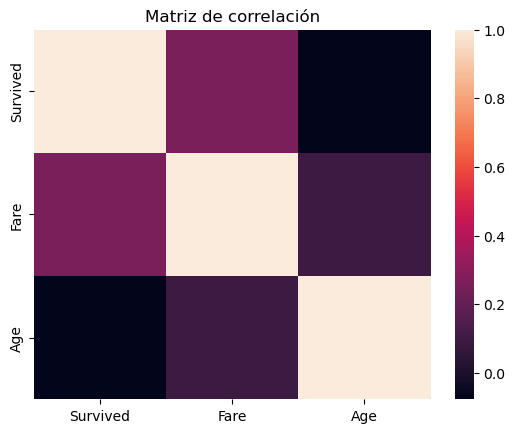

In [249]:
sns.heatmap(corr)
plt.title("Matriz de correlación")
plt.show()

In [ ]:
x_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

tree= DecisionTreeClassifier()

arbol = tree.fit(X_train, y_train)

plot_tree(arbol)

In [ ]:
print(X_train.columns)
print(X_test.columns)

In [ ]:
predicciones = arbol.predict(X_test)

In [ ]:
Predicciones

In [ ]:
#Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=["Actual"], colnames=["predicciones"]

In [ ]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

In [ ]:
precision = precision_score(y_test, predicciones, average="weighted")
precisión

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicciones, zero_division=1))

In [ ]:
recall = recall_score(y_test, predicciones, average = "weighted")
recall

In [ ]:
f1 = f1_score(y_test, predicciones, average="weighted")
f1